In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns
import plotly.offline as plo

In [2]:
# Read world population data

costco = pd.read_csv('C:/Users/Supraja/Desktop/Supraja WORK Apps/8. DSC640/Data/costcos-geocoded.csv')
ppg = pd.read_csv('C:/Users/Supraja/Desktop/Supraja WORK Apps/8. DSC640/Data/ppg2008.csv')


### Heat Map

In [5]:
ppg = ppg.set_index('Name  ')
# Normalize data
ppg_norm = (ppg-ppg.mean())/ppg.std()

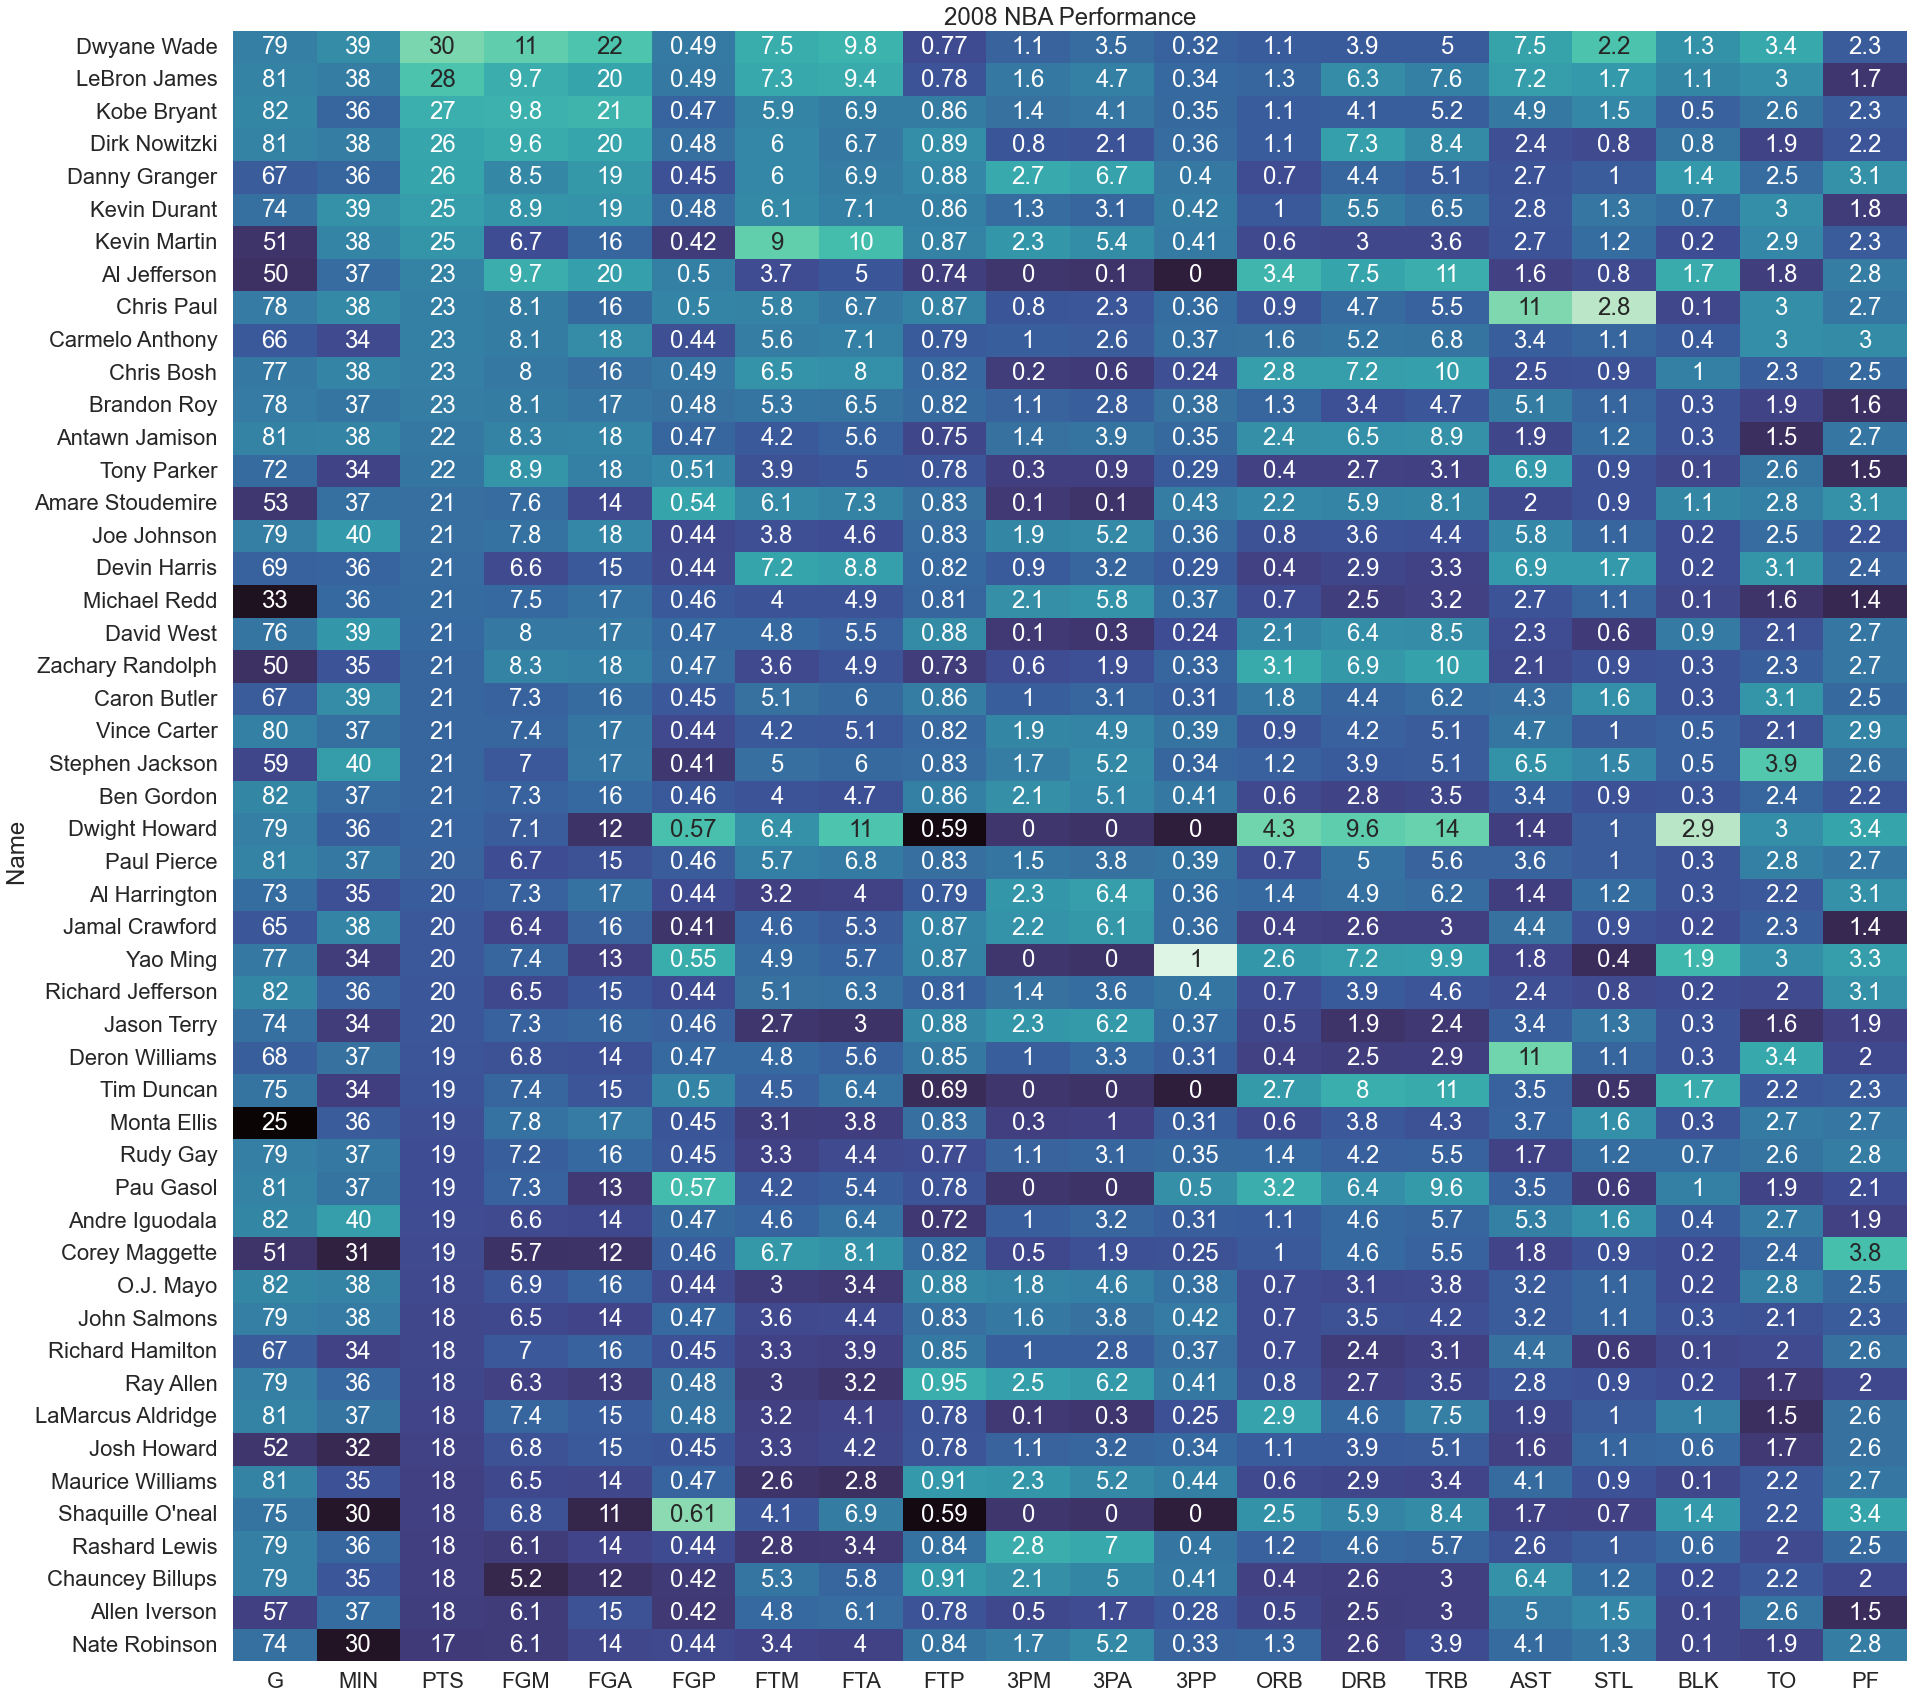

In [7]:
# Build a heatmap
sns.set(rc = {'figure.figsize':(30,30)})
sns.set(font_scale = 2)
sns.heatmap(ppg_norm, cmap="mako", annot=ppg, cbar=False).set(title='2008 NBA Performance')
plt.show()

### Spatial Plot

In [15]:
# Load libraries
from mpl_toolkits.basemap import Basemap

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'USA Costco Locations')

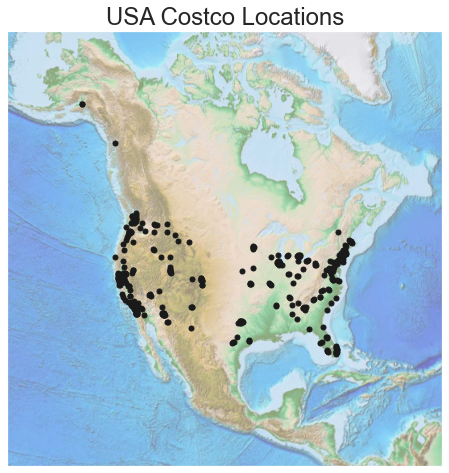

In [16]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution=None,
            width=8E6, height=8E6, 
            lat_0=45, lon_0=-100,)
m.etopo(scale=0.5, alpha=0.5)

for index, row in costco.iterrows():
    City = row['City']
    Latitude = row['Latitude']
    Longitude = row['Longitude']
    x, y = m(Longitude, Latitude)
    plt.plot(x, y, 'ok', markersize=5)

plt.title('USA Costco Locations')

### Contour Plot

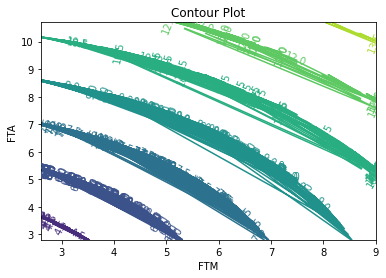

In [15]:
%matplotlib inline

# define function

def f(x, y):
    """
    Args:
        two numpy arrays (x, y)
    Returns:
        square root of sum of square of x and y
    """
    return np.sqrt(x**2 + y**2)

x = np.array(ppg['FTM'])
y = np.array(ppg['FTA'])

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

plt.figure()
cp = plt.contour(X, Y, Z)
plt.clabel(cp, inline=True, 
          fontsize=10)
plt.title('Contour Plot')
plt.xlabel('FTM')
plt.ylabel('FTA')
plt.show()